# Image Segmentation using K Means Clustering
image segmentation is the process of partitioning an image into multiple segments. The goal of segmenting an image is to change the representation of an image into something that is more meaningful and easier to analyze. It is usually used for locating objects and creating boundaries.

its not always great processing the entire image coze many parts in an image may not contain any useful information. So by segmenting an image, I can now make use of only important segements for processing

Images are usually made of given given pixes.in image segmentaion pixels that are simmilar are grouped together. By this it createsa pixel-wise mask for objects in image which gives us more comprehensive and granular understandig of the object


### I will use K-Means Clustering to perfor the image segmentation.
Clustering algorithms are unsupervised algorithms which means that there is no labelled data available. It is used to identify different classes or clusters in the given data based on how similar the data is. Data points in the same group are more similar to other data points in that same group than those in other groups

K represents the Number of clusters.this is how it works

 - Choose the number of clusters you want to find which is k.
 - Randomly assign the data points to any of the k clusters.
 - Then calculate the center of the clusters.
 - Calculate the distance of the data points from the centers of each of the clusters.
 - Depending on the distance of each data point from the cluster, reassign the data points to the nearest clusters.
 - Again calculate the new cluster center.
 - Repeat steps 4,5 and 6 till data points don’t change the clusters, or till we reach the assigned number of iterations.


 ## Importing Requirements


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### reading image

In [2]:
image = cv2.imread('drive/MyDrive/Colab Notebooks/Project Dataset/cat.jpg')

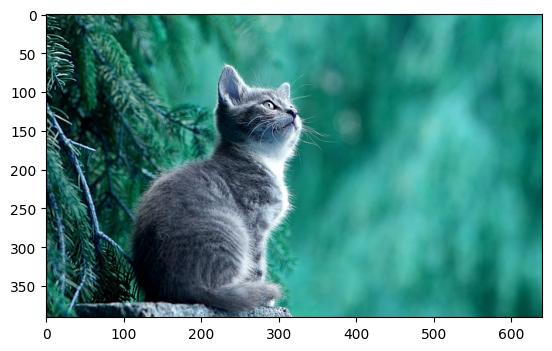

In [3]:
plt.imshow(image)
plt.show()

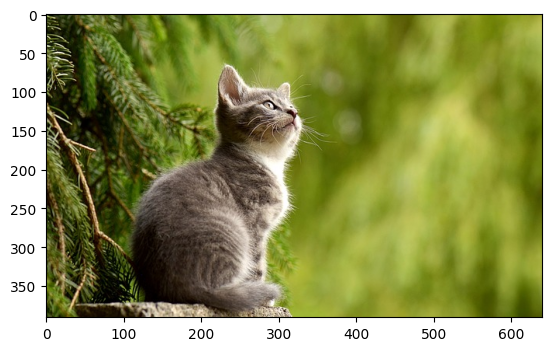

In [4]:
# Change Colure to RGB from BGR
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [6]:
image.shape

(391, 640, 3)

image is a 3 dimension  shape but in oder to apply the K mean clustering on it I need to reshape it to 2 dimensional Array

In [7]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1, 3))

# Convert to float type
pixel_vals =  np.float32(pixel_vals)

### Implimentiong the K-mean Algrorithim
Taking k=3, this means the alogrithim will only identify 3 clusters in the image

In [8]:
# This will stop the code from running  after either 100 iterations or the epsilon becomes 85%(The required accuracy)
criteria = (cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER , 100, 0.85)

In [20]:
def perform_kmeans_clustering(image, pixel_vals, criteria, k):
    # Perform K-means Clustering with Number of clustering defined as k
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # Reshape data into the original image dimension
    segmented_image = segmented_data.reshape((image.shape))

    # Display the image
    plt.imshow(segmented_image)
    plt.show()



Lets View image with 3 clusters K = 3

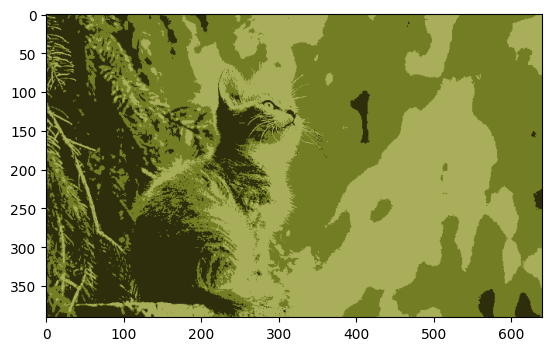

In [21]:
perform_kmeans_clustering(image, pixel_vals, criteria, k=3)

Lets View image with 6 clusters K = 6

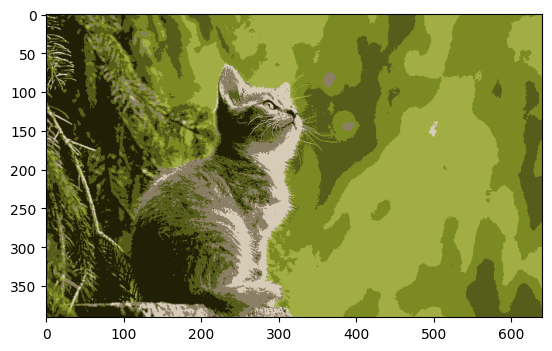

In [23]:
perform_kmeans_clustering(image, pixel_vals, criteria, k=6)

Lets View image with 9 clusters K = 9

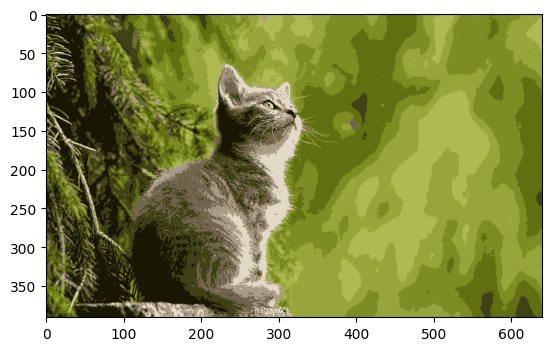

In [25]:
perform_kmeans_clustering(image, pixel_vals, criteria, k=9)

As We can see the Increase of the Value of K results to the image becoming more clear Becouse the K -mean Can classify more Clusters of colors. K means only works best on small data sets. It can segment objects in an image and also give better results